In [1]:
import requests
import yfinance as yf # Used to grab the stock prices, with yahoo
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from utils.MCForecastTools import MCSimulation

In [54]:
amazon = yf.Ticker("AMZN")
walmart = yf.Ticker("WMT")
ebay = yf.Ticker("EBAY")
target = yf.Ticker("TGT")
overstock = yf.Ticker("OSTK")
print(walmart)

yfinance.Ticker object <WMT>


In [55]:
total_investment = 500000

#Amazon Data
initial_amazon_price = 1627.800049
initial_amazon_investment = 100000
amount_of_amazon_stock = initial_amazon_investment/initial_amazon_price
current_amazon_price = amazon.info['open']
current_amazon_investment_value = current_amazon_price * amount_of_amazon_stock

#Walmart Data
initial_walmart_price = 97.519066
initial_walmart_investment = 100000
amount_of_walmart_stock = initial_walmart_investment/initial_walmart_price
current_walmart_price = walmart.info['open']
current_walmart_investment_value = current_walmart_price * amount_of_walmart_stock

#Ebay Data
initial_ebay_price = 28.541014
initial_ebay_investment = 100000
amount_of_ebay_stock = initial_ebay_investment/initial_ebay_price
current_ebay_price = ebay.info['open']
current_ebay_investment_value = current_ebay_price * amount_of_ebay_stock

#Target Data
initial_target_price = 79.590614
initial_target_investment = 100000
amount_of_target_stock = initial_target_investment/initial_target_price
current_target_price = target.info['open']
current_target_investment_value = current_target_price * amount_of_target_stock

#Overstock Data
initial_overstock_price = 19.799999
initial_overstock_investment = 100000
amount_of_overstock_stock = initial_overstock_investment/initial_overstock_price
current_overstock_price = overstock.info['open']
current_overstock_investment_value = current_overstock_price * amount_of_overstock_stock


print("Current Amazon Price:",current_amazon_price)
print("Current Amazon Investment Value:",current_amazon_investment_value)
print("Current Walmart Price:",current_walmart_price)
print("Current Walmart Investment Value:",current_walmart_investment_value)
print("Current Ebay Price:",current_ebay_price)
print("Current Ebay Investment Value:",current_ebay_investment_value)
print("Current Target Price:",current_target_price)
print("Current Target Investment Value:",current_target_investment_value)
print("Current Overstock Price:",current_overstock_price)
print("Current Overstock Investment Value:",current_overstock_investment_value)

Current Amazon Price: 3477
Current Amazon Investment Value: 213601.173076264
Current Walmart Price: 152
Current Walmart Investment Value: 155866.95631395813
Current Ebay Price: 76.65
Current Ebay Investment Value: 268560.88574848813
Current Target Price: 261
Current Target Investment Value: 327928.11473976064
Current Overstock Price: 104.51
Current Overstock Investment Value: 527828.3094862782


# Amazon Expected Rate of Return Calculations

In [56]:
amazon_historical_year1_begin = amazon.history(start="2018-11-05", end="2018-11-06")
amazon_historical_year1_end = amazon.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_amazon = amazon_historical_year1_begin['Close']['2018-11-05']
current_value_year1_amazon= amazon_historical_year1_end['Close']['2019-11-05']

In [57]:
year1_ror_amazon = ((current_value_year1_amazon - initial_value_year1_amazon)/initial_value_year1_amazon)*100

year1_ror_amazon

10.683739211985838

In [58]:
amazon_historical_year2_begin = amazon.history(start="2019-11-05", end="2019-11-06")
amazon_historical_year2_end = amazon.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_amazon = amazon_historical_year2_begin['Close']['2019-11-05']
current_value_year2_amazon= amazon_historical_year2_end['Close']['2020-11-05']

In [59]:
year2_ror_amazon = ((current_value_year2_amazon - initial_value_year2_amazon)/initial_value_year2_amazon)*100

year2_ror_amazon

84.38039817859662

In [60]:
amazon_historical_year3_begin = amazon.history(start="2020-11-05", end="2020-11-06")
amazon_historical_year3_end = amazon.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_amazon = amazon_historical_year3_begin['Close']['2020-11-05']
current_value_year3_amazon= amazon_historical_year3_end['Close']['2021-11-03']

In [61]:
year3_ror_amazon = ((current_value_year3_amazon - initial_value_year3_amazon)/initial_value_year3_amazon)*100

year3_ror_amazon

1.8663455749548463

In [62]:
expected_ror_amazon = (year1_ror_amazon + year2_ror_amazon + year3_ror_amazon)/3

expected_ror_amazon

32.310160988512436

# Walmart Expected Rate of Return Calculations

In [63]:
walmart_historical_year1_begin = walmart.history(start="2018-11-05", end="2018-11-06")
walmart_historical_year1_end = walmart.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_wmt = walmart_historical_year1_begin['Close']['2018-11-05']
current_value_year1_wmt= walmart_historical_year1_end['Close']['2019-11-05']

In [64]:
year1_ror_wmt = ((current_value_year1_wmt - initial_value_year1_wmt)/initial_value_year1_wmt)*100

year1_ror_wmt

17.952104116275233

In [65]:
walmart_historical_year2_begin = walmart.history(start="2019-11-05", end="2019-11-06")
walmart_historical_year2_end = walmart.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_wmt = walmart_historical_year2_begin['Close']['2019-11-05']
current_value_year2_wmt= walmart_historical_year2_end['Close']['2020-11-05']

In [66]:
year2_ror_wmt = ((current_value_year2_wmt - initial_value_year2_wmt)/initial_value_year2_wmt)*100

year2_ror_wmt

22.82151654564294

In [67]:
walmart_historical_year3_begin = walmart.history(start="2020-11-05", end="2020-11-06")
walmart_historical_year3_end = walmart.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_wmt = walmart_historical_year3_begin['Close']['2020-11-05']
current_value_year3_wmt= walmart_historical_year3_end['Close']['2021-11-03']

In [68]:
year3_ror_wmt = ((current_value_year3_wmt - initial_value_year3_wmt)/initial_value_year3_wmt)*100

year3_ror_wmt

6.302252262469096

In [69]:
expected_ror_wmt = (year1_ror_wmt + year2_ror_wmt + year3_ror_wmt)/3

expected_ror_wmt

15.691957641462423

# Ebay Expected Rate of Return Calculations

In [70]:
ebay_historical_year1_begin = ebay.history(start="2018-11-05", end="2018-11-06")
ebay_historical_year1_end = ebay.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_ebay = ebay_historical_year1_begin['Close']['2018-11-05']
current_value_year1_ebay= ebay_historical_year1_end['Close']['2019-11-05']

In [71]:
year1_ror_ebay = ((current_value_year1_ebay - initial_value_year1_ebay)/initial_value_year1_ebay)*100

year1_ror_ebay

21.0365449428591

In [72]:
ebay_historical_year2_begin = ebay.history(start="2019-11-05", end="2019-11-06")
ebay_historical_year2_end = ebay.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_ebay = ebay_historical_year2_begin['Close']['2019-11-05']
current_value_year2_ebay= ebay_historical_year2_end['Close']['2020-11-05']

In [73]:
year2_ror_ebay = ((current_value_year2_ebay - initial_value_year2_ebay)/initial_value_year2_ebay)*100

year2_ror_ebay

41.37555888332547

In [74]:
ebay_historical_year3_begin = ebay.history(start="2020-11-05", end="2020-11-06")
ebay_historical_year3_end = ebay.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_ebay = ebay_historical_year3_begin['Close']['2020-11-05']
current_value_year3_ebay= ebay_historical_year3_end['Close']['2021-11-03']

In [75]:
year3_ror_ebay = ((current_value_year3_ebay - initial_value_year3_ebay)/initial_value_year3_ebay)*100

year3_ror_ebay

54.48945270214486

In [76]:
expected_ror_ebay = (year1_ror_ebay + year2_ror_ebay + year3_ror_ebay)/3

expected_ror_ebay

38.96718550944314

# Target Expected Rate of Return Calculations

In [77]:
target_historical_year1_begin = target.history(start="2018-11-05", end="2018-11-06")
target_historical_year1_end = target.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_target = target_historical_year1_begin['Close']['2018-11-05']
current_value_year1_target= target_historical_year1_end['Close']['2019-11-05']

In [78]:
year1_ror_target = ((current_value_year1_target - initial_value_year1_target)/initial_value_year1_target)*100

year1_ror_target

33.372088709647265

In [79]:
target_historical_year2_begin = target.history(start="2019-11-05", end="2019-11-06")
target_historical_year2_end = target.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_target = target_historical_year2_begin['Close']['2019-11-05']
current_value_year2_target= target_historical_year2_end['Close']['2020-11-05']

In [80]:
year2_ror_target = ((current_value_year2_target - initial_value_year2_target)/initial_value_year2_target)*100

year2_ror_target

47.307620628610564

In [81]:
target_historical_year3_begin = target.history(start="2020-11-05", end="2020-11-06")
target_historical_year3_end = target.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_target = target_historical_year3_begin['Close']['2020-11-05']
current_value_year3_target= target_historical_year3_end['Close']['2021-11-03']

In [82]:
year3_ror_target = ((current_value_year3_target - initial_value_year3_target)/initial_value_year3_target)*100

year3_ror_target

66.5350453183703

In [83]:
expected_ror_target = (year1_ror_target + year2_ror_target + year3_ror_target)/3

expected_ror_target

49.071584885542705

# Overstock Expected Rate of Return Calculations

In [84]:
overstock_historical_year1_begin = overstock.history(start="2018-11-05", end="2018-11-06")
overstock_historical_year1_end = overstock.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_overstock = overstock_historical_year1_begin['Close']['2018-11-05']
current_value_year1_overstock= overstock_historical_year1_end['Close']['2019-11-05']

In [85]:
year1_ror_overstock = ((current_value_year1_overstock - initial_value_year1_overstock)/initial_value_year1_overstock)*100

year1_ror_overstock

-49.34343374015091

In [86]:
overstock_historical_year2_begin = overstock.history(start="2019-11-05", end="2019-11-06")
overstock_historical_year2_end = overstock.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_overstock = overstock_historical_year2_begin['Close']['2019-11-05']
current_value_year2_overstock= overstock_historical_year2_end['Close']['2020-11-05']

In [87]:
year2_ror_overstock = ((current_value_year2_overstock - initial_value_year2_overstock)/initial_value_year2_overstock)*100

year2_ror_overstock

583.3499774702757

In [88]:
overstock_historical_year3_begin = overstock.history(start="2020-11-05", end="2020-11-06")
overstock_historical_year3_end = overstock.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_overstock = overstock_historical_year3_begin['Close']['2020-11-05']
current_value_year3_overstock= overstock_historical_year3_end['Close']['2021-11-03']

In [89]:
year3_ror_overstock = ((current_value_year3_overstock - initial_value_year3_overstock)/initial_value_year3_overstock)*100

year3_ror_overstock

52.90341647488361

In [90]:
expected_ror_overstock = (year1_ror_overstock + year2_ror_overstock + year3_ror_overstock)/3

expected_ror_overstock

195.6366534016695

In [91]:
amazon_history = amazon.history(period = "3y")

amazon_history['Close']

Date
2018-11-06    1642.810059
2018-11-07    1755.489990
2018-11-08    1754.910034
2018-11-09    1712.430054
2018-11-12    1636.849976
                 ...     
2021-11-01    3318.110107
2021-11-02    3312.750000
2021-11-03    3384.000000
2021-11-04    3477.000000
2021-11-05    3518.989990
Name: Close, Length: 756, dtype: float64

In [92]:
walmart_history = walmart.history(period = "3y")

walmart_history['Close']

Date
2018-11-06     97.917046
2018-11-07     98.855186
2018-11-08     99.385849
2018-11-09    100.030228
2018-11-12     98.428764
                 ...    
2021-11-01    149.789993
2021-11-02    149.720001
2021-11-03    150.179993
2021-11-04    151.279999
2021-11-05    150.229996
Name: Close, Length: 756, dtype: float64

In [93]:
ebay_history = ebay.history(period = "3y")

ebay_history['Close']

Date
2018-11-06    28.839523
2018-11-07    28.752861
2018-11-08    28.733597
2018-11-09    28.531384
2018-11-12    27.886225
                ...    
2021-11-01    76.300003
2021-11-02    74.900002
2021-11-03    75.449997
2021-11-04    76.279999
2021-11-05    75.570000
Name: Close, Length: 756, dtype: float64

In [94]:
target_history = target.history(period = "3y")

target_history['Close']

Date
2018-11-06     79.814415
2018-11-07     80.905472
2018-11-08     81.688789
2018-11-09     81.073334
2018-11-12     79.702515
                 ...    
2021-11-01    257.920013
2021-11-02    260.260010
2021-11-03    260.410004
2021-11-04    260.440002
2021-11-05    254.270004
Name: Close, Length: 756, dtype: float64

In [95]:
overstock_history = overstock.history(period = "3y")

overstock_history['Close']

Date
2018-11-06     19.520000
2018-11-07     20.580000
2018-11-08     20.360001
2018-11-09     17.200001
2018-11-12     17.760000
                 ...    
2021-11-01     94.669998
2021-11-02    101.360001
2021-11-03    104.800003
2021-11-04    104.889999
2021-11-05    104.459999
Name: Close, Length: 756, dtype: float64

In [96]:
start = datetime(2018, 11, 5)
symbols_list = ['AMZN', 'WMT', 'EBAY', 'TGT', 'OSTK']


In [97]:
overstock_df = pd.DataFrame(data = overstock_history['Close'])
target_df = pd.DataFrame(data = target_history['Close'])
ebay_df = pd.DataFrame(data = ebay_history['Close'])
walmart_df = pd.DataFrame(data = walmart_history['Close'])
amazon_df = pd.DataFrame(data = amazon_history['Close'])


dataframe = pd.concat([overstock_df, target_df, ebay_df, walmart_df, amazon_df], axis = 1)

dataframe.columns = [ "Overstock", "Target", "Ebay", "Walmart", "Amazon"]
display(dataframe)

,Overstock,Target,Ebay,Walmart,Amazon
Date,,,,,
2018-11-06,19.520000,79.814415,28.839523,97.917046,1642.810059
2018-11-07,20.580000,80.905472,28.752861,98.855186,1755.489990
2018-11-08,20.360001,81.688789,28.733597,99.385849,1754.910034
2018-11-09,17.200001,81.073334,28.531384,100.030228,1712.430054
2018-11-12,17.760000,79.702515,27.886225,98.428764,1636.849976
...,...,...,...,...,...
2021-11-01,94.669998,257.920013,76.300003,149.789993,3318.110107
2021-11-02,101.360001,260.260010,74.900002,149.720001,3312.750000
2021-11-03,104.800003,260.410004,75.449997,150.179993,3384.000000


In [98]:
corr_df = dataframe.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head(10)

,Overstock,Target,Ebay,Walmart,Amazon
Overstock,1.000000,0.825944,0.881101,0.804295,0.920658
Target,0.825944,1.000000,0.935483,0.896155,0.887448
Ebay,0.881101,0.935483,1.000000,0.851799,0.922467
Walmart,0.804295,0.896155,0.851799,1.000000,0.921235
Amazon,0.920658,0.887448,0.922467,0.921235,1.000000


<AxesSubplot:>

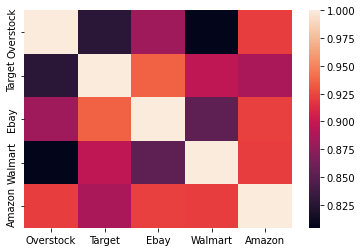

In [99]:
# Create a heatmap from the correlation values
sns.heatmap(corr_df)

# Overstock Portfolio Variances

In [100]:
overstock_std = float(overstock_df['Close'].std())/100
target_std = float(target_df['Close'].std())/100
ebay_std = float(ebay_df['Close'].std())/100
walmart_std = float(walmart_df['Close'].std())/100
amazon_std = float(amazon_df['Close'].std())/100

In [101]:
display(overstock_std)
display(target_std)
display(ebay_std)
display(walmart_std)
display(amazon_std)

0.323213664107918

0.602981943797412

0.14021164434948952

0.18667426424570568

7.221239369418297

In [102]:
def variance(weight1, std_1, weight2, std_2, corr_ratio):
    variance = (((weight1 ** 2) * (std_1 ** 2)) + ((weight2 ** 2) * (std_2 ** 2)) + ((weight1 ** 2) * (std_1 ** 2) * (weight2 ** 2) * (std_2 ** 2) * (corr_ratio)))
    return variance
                                                                                 

In [103]:
ostk_to_target_variance = variance(.50,overstock_std,.50,target_std,0.825182)
ostk_to_ebay_variance = variance(.50,overstock_std,.50,ebay_std,0.880374)
ostk_to_walmart_variance = variance(.50,overstock_std,.50,walmart_std,0.803650)
ostk_to_amazon_variance = variance(.50,overstock_std,.50,amazon_std,0.825182)

ostk_to_target_percentage = "{:.2%}".format(ostk_to_target_variance)
ostk_to_ebay_percentage = "{:.2%}".format(ostk_to_ebay_variance)
ostk_to_walmart_percentage = "{:.2%}".format(ostk_to_walmart_variance)
ostk_to_amazon_percentage = "{:.2%}".format(ostk_to_amazon_variance)

print("Overstock and Target Portfolio Variance",ostk_to_target_percentage)
print("Overstock and Ebay Portfolio Variance",ostk_to_ebay_percentage)
print("Overstock and Walmart Portfolio Variance",ostk_to_walmart_percentage)
print("Overstock and Amazon Portfolio Variance",ostk_to_amazon_percentage)

Overstock and Target Portfolio Variance 11.90%
Overstock and Ebay Portfolio Variance 3.11%
Overstock and Walmart Portfolio Variance 3.50%
Overstock and Amazon Portfolio Variance 1334.36%


In [104]:
tgt_to_ebay_variance = variance(.50,target_std,.50,ebay_std,0.935200)
tgt_to_walmart_variance = variance(.50,target_std,.50,walmart_std,0.895973)
tgt_to_amazon_variance = variance(.50,target_std,.50,amazon_std,0.887384)

tgt_to_ebay_percentage = "{:.2%}".format(tgt_to_ebay_variance)
tgt_to_walmart_percentage = "{:.2%}".format(tgt_to_walmart_variance)
tgt_to_amazon_percentage = "{:.2%}".format(tgt_to_amazon_variance)


print("Target and Ebay Portfolio Variance",tgt_to_ebay_percentage)
print("Target and Walmart Portfolio Variance",tgt_to_walmart_percentage)
print("Target and Amazon Portfolio Variance",tgt_to_amazon_percentage)

Target and Ebay Portfolio Variance 9.62%
Target and Walmart Portfolio Variance 10.03%
Target and Amazon Portfolio Variance 1417.90%


In [105]:
ebay_to_walmart_variance = variance(.50,ebay_std,.50,walmart_std,0.851683)
ebay_to_amazon_variance = variance(.50,ebay_std,.50,amazon_std,0.922619)

ebay_to_walmart_percentage = "{:.2%}".format(ebay_to_walmart_variance)
ebay_to_amazon_percentage = "{:.2%}".format(ebay_to_amazon_variance)


print("Ebay and Walmart Portfolio Variance",ebay_to_walmart_percentage)
print("Ebay and Amazon Portfolio Variance",ebay_to_amazon_percentage)

Ebay and Walmart Portfolio Variance 1.37%
Ebay and Amazon Portfolio Variance 1310.06%


In [106]:
walmart_to_amazon_variance = variance(.50,walmart_std,.50,amazon_std,0.921194)

walmart_to_amazon_percentage = "{:.2%}".format(walmart_to_amazon_variance)

print("Walmart and Amazon Portfolio Variance",walmart_to_amazon_percentage)

Walmart and Amazon Portfolio Variance 1314.99%
